<a href="https://colab.research.google.com/github/Rajibsigdel12345/DevnagariScriptRecognition/blob/main/DevnagariScriptRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d rishianand/devanagari-character-set
! mkdir train
! unzip devanagari-character-set.zip -d train

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                     Online Food Dataset                             3KB  2024-03-02 18:50:30          15836        318  0.9411765        
saurabhbadole/latest-data-science-job-salaries-2024     Latest Data Science Job Salaries 2020 - 2024   69KB  2024-03-26 19:00:33            980         26  1.0              
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17          23021        376  1.0              
bhavikjikadara/student-study-performance                Student Study 

In [140]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [141]:
df = pd.read_csv('/content/train/data.csv')
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [142]:
a = np.array(df.iloc[5000].tolist()[0:-1]).reshape(32,-1)

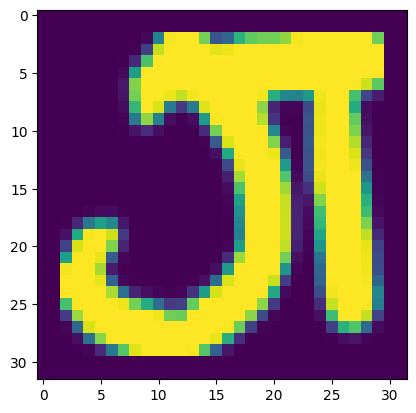

In [143]:
plt.imshow(a)

In [144]:
batch_size = 32
img_height = 32
img_width = 32
data_dir = '/content/train/Images/Images'
kernel_size = (3,3)
pool_size = (2,2)
epochs = 500

In [145]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed  = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 92000 files belonging to 46 classes.
Using 73600 files for training.
Found 92000 files belonging to 46 classes.
Using 18400 files for validation.


In [146]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)


In [147]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [148]:
import tensorflow.keras.layers as tfl


In [149]:
input = tfl.Input(shape = (img_height,img_width,3))
x = tfl.Conv2D(8,kernel_size = kernel_size, padding = 'same', strides = (1,1))(input)
x = tfl.ReLU()(x)
x = tfl.MaxPooling2D(pool_size = pool_size, padding = 'same')(x)
x = tfl.Conv2D(16, kernel_size = kernel_size , padding = 'same', strides = (2,2))(x)
x = tfl.ReLU()(x)
x = tfl.MaxPooling2D(pool_size = pool_size, padding = 'same', strides = (1,1))(x)
x = tfl.Conv2D(32, kernel_size = kernel_size , padding = 'valid', strides = (2,2))(x)
x = tfl.ReLU()(x)
x = tfl.Flatten()(x)
x = tfl.Dense(400, activation= 'relu')(x)
x = tfl.Dropout(0.2)(x)
output = tfl.Dense(46,activation = 'softmax')(x)
model = tf.keras.Model(inputs = input , outputs = output)

In [150]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 re_lu_13 (ReLU)             (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 16)          1168      
                                                                 
 re_lu_14 (ReLU)             (None, 8, 8, 16)          0         
                                                           

In [151]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])

In [161]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.EarlyStopping(),tf.keras.callbacks.ModelCheckpoint(filepath ='/content/train/checkpoint' )],
    shuffle = True,
    )

Epoch 1/500
2300/2300 [==============================] - 20s 9ms/step - loss: 0.2000 - accuracy: 0.9378 - val_loss: 0.1934 - val_accuracy: 0.9426
Epoch 2/500
2300/2300 [==============================] - 20s 9ms/step - loss: 0.1764 - accuracy: 0.9448 - val_loss: 0.1754 - val_accuracy: 0.9489
Epoch 3/500
2300/2300 [==============================] - 19s 8ms/step - loss: 0.1573 - accuracy: 0.9515 - val_loss: 0.1864 - val_accuracy: 0.9486


In [195]:
from keras.preprocessing.image import load_img, img_to_array
my_image = load_img('/content/sample.jpg')
my_image = tf.image.resize_with_pad(my_image,target_height = 32, target_width = 32)
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image.shape

(1, 32, 32, 3)

In [196]:
prediction = model.predict(my_image)

1/1 [==============================] - 0s 19ms/step


In [177]:
prediction

array([[4.1669201e-23, 1.0000000e+00, 1.9452639e-15, 2.3128109e-21,
        3.8613760e-17, 4.7791932e-19, 1.5147454e-18, 3.3043255e-15,
        2.9983340e-15, 2.4491788e-21, 8.3516775e-24, 1.3452184e-19,
        1.2052367e-15, 6.8470120e-16, 6.8582194e-18, 6.3476877e-16,
        3.1122375e-22, 3.4761781e-15, 1.0701419e-22, 4.8914203e-22,
        2.2309943e-17, 4.5505525e-20, 6.1259236e-17, 3.7481974e-20,
        1.1369880e-17, 2.8385668e-14, 8.2159284e-16, 1.2401919e-17,
        8.4306300e-20, 8.2845735e-15, 2.4258237e-19, 5.3498287e-12,
        1.3478606e-16, 1.1094507e-18, 1.6126579e-20, 2.4546810e-19,
        1.4333401e-24, 4.8522763e-24, 1.4850686e-17, 2.3739931e-17,
        2.5088091e-21, 4.8507687e-20, 8.5285853e-18, 2.5268988e-18,
        1.8273310e-21, 1.4326418e-22]], dtype=float32)

In [197]:
prediction = np.argmax(prediction, axis = 1)

In [157]:
import os

In [158]:
path= os.walk('/content/train/Images/Images')

In [189]:
map = {
41:'४',
19:'ध',
42:'५',
9:'झ',
31:'ष',
23:'ब',
3:'ग',
11:'ट',
35:'त्र',
39:'२',
7:'छ',
26:'य',
30:'श',
43:'६',
46:'९',
28:'ल',
10:'न',
1:'क',
40:'३',
36:'ज्ञ',
16:'त',
4:'घ',
15:'ण',
38:'१',
12:'ठ',
45:'८',
25:'म',
13:'ड',
32:'स',
37:'०',
27:'र',
20:'न',
5:'ङ',
29:'व',
2:'ख',
44:'७',
33:'ह',
8:'ज',
22:'फ',
21:'प',
34:'क्ष',
24:'भ',
17:'थ',
6:'च',
14:'ढ',
18:'द',
}

In [ ]:
a = list(val_ds)
# model.predict([tf.io.decode_image()])

In [198]:
map[prediction[0]+1]


'ष'